<a href="https://colab.research.google.com/github/nielcosta/analise-de-dados/blob/main/Analise_Qualidade_de_Ar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Qualidade de Ar

Medições detalhadas da qualidade do ar em diferentes locais

Retirado : https://www.kaggle.com/datasets/sahirmaharajj/air-pollution-dataset/discussion

Com os dados  oferecidos podemos analisar:

Tendências na poluição do ar ao longo do tempo.
Identificar áreas geográficas com qualidade do ar consistentemente baixa.
Avaliar a eficácia das políticas de gestão da qualidade do ar e de redução da poluição.
Correlacionar dados de qualidade do ar com resultados de saúde pública.

### Carregando as Bibliotecas




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Carregando os dados


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Analise de Dados/Estudo/Qualidade de Ar/Air_Quality.csv',encoding="utf-8")
df

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16213,130750,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,UHF42,211,Williamsburg - Bushwick,2005,01/01/2005,3.10,NaN
16214,130780,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,Borough,5,Staten Island,2005,01/01/2005,2.30,NaN
16215,131020,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,504,South Beach - Tottenville,2005-2007,01/01/2005,7.50,NaN
16216,131026,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",Borough,5,Staten Island,2005-2007,01/01/2005,7.80,NaN


In [3]:
df = df.rename(columns={
                  'Unique ID' : 'ID',
                  'Indicator ID': 'Indicador',
                  'Name':'Nome',
                  'Measure':'Medida',
                  'Measure Info':'Info_Medidas',
                  'Geo Type Name':'Tipo_Geografico',
                  'Geo Join ID':'ID_Juncao_Geo',
                  'Geo Place Name':'Local Geografico',
                  'Time Period':'Periodo',
                  'Start_Date':'Data de Inicio',
                  'Data Value':'Valor_Dados',
                  'Message':'Mensagem'
                 })
df

,ID,Indicador,Nome,Medida,Info_Medidas,Tipo_Geografico,ID_Juncao_Geo,Local Geografico,Periodo,Data de Inicio,Valor_Dados,Mensagem
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16213,130750,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,UHF42,211,Williamsburg - Bushwick,2005,01/01/2005,3.10,NaN
16214,130780,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,Borough,5,Staten Island,2005,01/01/2005,2.30,NaN
16215,131020,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,504,South Beach - Tottenville,2005-2007,01/01/2005,7.50,NaN
16216,131026,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",Borough,5,Staten Island,2005-2007,01/01/2005,7.80,NaN


In [4]:
# Na coluna Periodo pegar todo conteudo de traz para frente e capturar o conteúdo até quando houver espaço ou '-' .

df['Periodo'] = df['Periodo'].str.split().str[-1].str.split('-').str[0]


In [5]:
# Concatenando "31/12/" com o valor em cada registro da coluna 'Periodo'
df['Periodo'] = "31/12/" + df['Periodo']
df


,ID,Indicador,Nome,Medida,Info_Medidas,Tipo_Geografico,ID_Juncao_Geo,Local Geografico,Periodo,Data de Inicio,Valor_Dados,Mensagem
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,31/12/2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,31/12/2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,31/12/2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,31/12/2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,31/12/2009,12/01/2008,22.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16213,130750,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,UHF42,211,Williamsburg - Bushwick,31/12/2005,01/01/2005,3.10,NaN
16214,130780,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,Borough,5,Staten Island,31/12/2005,01/01/2005,2.30,NaN
16215,131020,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,504,South Beach - Tottenville,31/12/2005,01/01/2005,7.50,NaN
16216,131026,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",Borough,5,Staten Island,31/12/2005,01/01/2005,7.80,NaN


In [6]:
# prompt: Capturar apenas as colunas , ID, Identificador, Nome , Medida, Local Geografico, Periodo, Data de Inicio, Valor_Dados

df_filtrado = df[['Nome', 'Local Geografico', 'Periodo', 'Data de Inicio', 'Valor_Dados']]
df_filtrado

,Nome,Local Geografico,Periodo,Data de Inicio,Valor_Dados
0,Nitrogen dioxide (NO2),Bedford Stuyvesant - Crown Heights,31/12/2011,12/01/2010,25.30
1,Nitrogen dioxide (NO2),Bedford Stuyvesant - Crown Heights,31/12/2009,12/01/2008,26.93
2,Nitrogen dioxide (NO2),East New York,31/12/2015,01/01/2015,19.09
3,Nitrogen dioxide (NO2),Fordham - Bronx Pk,31/12/2015,01/01/2015,19.76
4,Nitrogen dioxide (NO2),Pelham - Throgs Neck,31/12/2009,12/01/2008,22.83
...,...,...,...,...,...
16213,Outdoor Air Toxics - Formaldehyde,Williamsburg - Bushwick,31/12/2005,01/01/2005,3.10
16214,Outdoor Air Toxics - Formaldehyde,Staten Island,31/12/2005,01/01/2005,2.30
16215,Cardiac and respiratory deaths due to Ozone,South Beach - Tottenville,31/12/2005,01/01/2005,7.50
16216,Cardiac and respiratory deaths due to Ozone,Staten Island,31/12/2005,01/01/2005,7.80


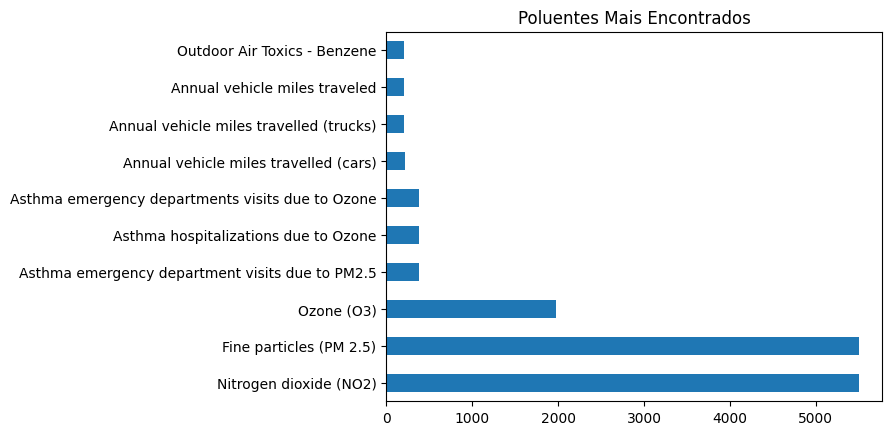

In [7]:
# prompt: Identifique o (Nome) dos poluentes mais encontrados , através dos seus valores.  Gere um Gráfico de Barras verticais.

# Calcular a frequência de cada poluente
frequencia_poluentes = df_filtrado['Nome'].value_counts()

# Selecionar os poluentes mais encontrados
poluentes_mais_encontrados = frequencia_poluentes.head(10)

# Criar um gráfico de barras verticais
poluentes_mais_encontrados.plot(kind='barh')

# Definir o título do gráfico
plt.title('Poluentes Mais Encontrados')

# Exibir o gráfico
plt.show()


In [11]:
# prompt: Crie uma tabela com os cincos Local Geograficos mais poluidos e identifique o toxico mais  presente nesses locais

# Filtrar os dados para os 5 locais geográficos mais poluídos
locais_mais_poluidos = df_filtrado['Local Geografico'].value_counts().head(5).index

# Criar uma lista vazia para armazenar os tóxicos mais presentes em cada local
toxicos_mais_presentes = []

# Iterar sobre os locais geográficos mais poluídos
for local in locais_mais_poluidos:
  # Filtrar os dados para o local geográfico atual
  df_local = df_filtrado[df_filtrado['Local Geografico'] == local]

  # Calcular a frequência de cada poluente no local atual
  frequencia_poluentes = df_local['Nome'].value_counts()

  # Selecionar o poluente mais encontrado no local atual
  toxico_mais_presente = frequencia_poluentes.index[0]

  # Adicionar o tóxico mais presente à lista
  toxicos_mais_presentes.append(toxico_mais_presente)

# Criar um DataFrame com os resultados
df_resultado = pd.DataFrame({'Local Geográfico': locais_mais_poluidos, 'Tóxico Mais Presente': toxicos_mais_presentes})

# Exibir o DataFrame
print(df_resultado)


                     Local Geográfico    Tóxico Mais Presente
0  Bedford Stuyvesant - Crown Heights  Nitrogen dioxide (NO2)
1                         West Queens  Nitrogen dioxide (NO2)
2                Flushing - Clearview  Nitrogen dioxide (NO2)
3                     Upper West Side  Nitrogen dioxide (NO2)
4                             Jamaica  Nitrogen dioxide (NO2)


In [20]:
# prompt: Crie um Gráfico Histograma animado,  identificando os 5 locais mais poluidos ( identificado no campo Local Geográfico) e verifique os valores de medida (Dados_Medida) , identificando a relação de poluição entre cada Local Geográfico. Identifique os valores Dados Medida (y) e identifique os Locais Geográficos em x . Dê um espaçamento para melhor identificação de cada local.

import plotly.express as px

# Filtrar os dados para os 5 locais geográficos mais poluídos
locais_mais_poluidos = df_filtrado['Local Geografico'].value_counts().head(5).index

# Criar um DataFrame com os dados dos 5 locais mais poluídos
df_poluidos = df_filtrado[df_filtrado['Local Geografico'].isin(locais_mais_poluidos)]

# Criar um gráfico histograma animado
fig = px.histogram(df_poluidos, x="Local Geografico", y="Valor_Dados", animation_frame="Periodo", animation_group="Local Geografico", color="Local Geografico")

# Atualizar o layout do gráfico
fig.update_layout(
    title='Poluição do Ar nos 5 Locais Mais Poluídos',
    xaxis_title='Local Geográfico',
    yaxis_title='Valor da Medida',
    xaxis={'categoryorder':'total descending'}
)

# Exibir o gráfico
fig.show()


In [21]:
# prompt: Crie uma tabela com os cincos Local Geograficos menos poluidos e identifique o toxico mais  presente nesses locais

# Filtrar os dados para os 5 locais geográficos menos poluídos
locais_menos_poluidos = df_filtrado['Local Geografico'].value_counts().tail(5).index

# Criar uma lista vazia para armazenar os tóxicos mais presentes em cada local
toxicos_menos_presentes = []

# Iterar sobre os locais geográficos menos poluídos
for local in locais_menos_poluidos:
  # Filtrar os dados para o local geográfico atual
  df_local = df_filtrado[df_filtrado['Local Geografico'] == local]

  # Calcular a frequência de cada poluente no local atual
  frequencia_poluentes = df_local['Nome'].value_counts()

  # Selecionar o poluente mais encontrado no local atual
  toxico_menos_presente = frequencia_poluentes.index[0]

  # Adicionar o tóxico mais presente à lista
  toxicos_menos_presentes.append(toxico_menos_presente)

# Criar um DataFrame com os resultados
df_resultado = pd.DataFrame({'Local Geográfico': locais_menos_poluidos, 'Tóxico Menos Presente': toxicos_menos_presentes})

# Exibir o DataFrame
print(df_resultado)


                    Local Geográfico    Tóxico Menos Presente
0  Bayside Little Neck-Fresh Meadows   Nitrogen dioxide (NO2)
1                        Northern SI   Nitrogen dioxide (NO2)
2           Upper East Side-Gramercy   Nitrogen dioxide (NO2)
3       Union Square-Lower Manhattan  Fine particles (PM 2.5)
4                    Chelsea-Village   Nitrogen dioxide (NO2)


In [27]:

# Importando bibliotecas
import pandas as pd
import numpy as np

# Creado  um DataFrame com os dados relevates.
df_poluicao = pd.DataFrame({
    'Local Geográfico': df_filtrado['Local Geografico'],
    'Período': df_filtrado['Periodo'],
    'Poluente': df_filtrado['Nome'],
    'Valor Medido': df_filtrado['Valor_Dados']
})

#Calcular o valor médio de poluição para cada local e período
df_poluicao['Valor Médio'] = df_poluicao.groupby(['Local Geográfico', 'Período'])['Valor Medido'].transform('mean')

# Crie uma tabela dinâmica para exibir os valores médios de poluição para cada local e período
df_pivot = df_poluicao.pivot_table(index='Local Geográfico', columns='Período', values='Valor Médio')

# Defina o nome do índice como 'Local' e os nomes das colunas como 'Ano
df_pivot.index.name = 'Local'
df_pivot.columns.name = 'Ano'

#  Preencha os valores faltantes com 0
df_pivot.fillna(0, inplace=True)

df_pivot


Ano,31/12/2005,31/12/2008,31/12/2009,31/12/2010,31/12/2011,31/12/2012,31/12/2013,31/12/2014,31/12/2015,31/12/2016,31/12/2017,31/12/2018,31/12/2019,31/12/2020,31/12/2021
Local,,,,,,,,,,,,,,,
Bay Ridge and Dyker Heights (CD10),20.466667,20.3050,19.386250,19.571429,14.426667,17.588571,17.472857,16.578571,16.271429,16.909000,15.551429,14.722857,15.248571,13.781429,14.516
Bayside - Little Neck,15.626667,18.7500,15.533889,18.187143,13.447778,13.031765,12.741000,12.450000,11.066000,17.570000,14.934286,14.007143,14.201429,12.868571,13.642
Bayside Little Neck-Fresh Meadows,0.000000,19.4500,18.255000,18.630000,17.282857,16.577143,16.875714,15.951429,15.541429,15.685714,15.221429,14.260000,14.434286,13.061429,13.800
Bayside and Little Neck (CD11),23.366667,18.9700,18.046250,18.370000,13.594444,16.318571,16.622857,15.824286,15.407143,17.320000,15.085714,14.151429,14.332857,13.004286,13.784
Bedford Stuyvesant (CD3),17.266667,23.3900,20.300000,20.928571,15.514444,18.900000,18.901429,17.644286,17.317143,16.587000,16.790000,15.921429,16.290000,14.641429,15.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Queens,24.713333,22.3050,21.940000,20.705000,17.272500,19.490417,17.180000,15.673750,18.814815,19.494118,16.970000,16.282857,16.445714,15.111429,15.726
Williamsbridge and Baychester (CD12),13.766667,20.4850,18.496250,18.732857,14.018889,17.424286,16.877143,16.424286,15.947143,15.172000,15.244286,14.380000,14.074286,13.995714,14.598
Williamsburg - Bushwick,52.220000,23.7075,41.297692,21.297143,17.635000,40.731667,17.613529,15.945000,29.177037,16.431765,17.280000,16.742857,17.017143,15.285714,15.898


In [28]:
#Criar  gráfico animado para exibir os valores médios de poluição para cada local e período

import plotly.graph_objects as go

# Creando uma Figura
fig = go.Figure()

# Criando iteração sobre o Local.
for location in df_pivot.index:
    # Crie um gráfico de dispersão para a localização atual
    fig.add_trace(go.Scatter(
        x=df_pivot.columns,
        y=df_pivot.loc[location],
        mode='lines',
        name=location
    ))

# Defina os rótulos do título e dos eixos
fig.update_layout(
    title='Valores Médios de Poluição por Local e Período',
    xaxis_title='Período',
    yaxis_title='Valor Médio de Poluição'
)

# Adicione um controle deslizante para animar o gráfico
fig.update_xaxes(
    rangeslider_visible=True
)

fig.show()


In [24]:
Gráfico Histograma animado,  identificando os 5 locais mais poluidos ( identificado no campo Local Geográfico) e verifique os valores de medida (Dados_Medida) .Relacione os  Locais Geograficos menos poluidos , verificndo os dados de medida  deste . Identifique os valores Dados Medida (y) e identifique os Locais Geográficos em x . Dê um espaçamento para melhor identificação de cada local.

# Filtrar os dados para os 5 locais geográficos mais poluídos
locais_mais_poluidos = df_filtrado['Local Geografico'].value_counts().head(5).index

# Criar um DataFrame com os dados dos 5 locais mais poluídos
df_poluidos = df_filtrado[df_filtrado['Local Geografico'].isin(locais_mais_poluidos)]

# Criar um gráfico histograma animado
fig = px.histogram(df_poluidos, x="Local Geografico", y="Valor_Dados", animation_frame="Periodo", animation_group="Local Geografico", color="Local Geografico")

# Atualizar o layout do gráfico
fig.update_layout(
    title='Poluição do Ar nos 5 Locais Mais Poluídos',
    xaxis_title='Local Geográfico',
    yaxis_title='Valor da Medida',
    xaxis={'categoryorder':'total descending'}
)

# Exibir o gráfico
fig.show()


# Filtrar os dados para os 5 locais geográficos menos poluídos
locais_menos_poluidos = df_filtrado['Local Geografico'].value_counts().tail(5).index

# Criar um DataFrame com os dados dos 5 locais menos poluídos
df_menos_poluidos = df_filtrado[df_filtrado['Local Geografico'].isin(locais_menos_poluidos)]

# Criar um gráfico histograma animado
fig = px.histogram(df_menos_poluidos, x="Local Geografico", y="Valor_Dados", animation_frame="Periodo", animation_group="Local Geografico", color="Local Geografico")

# Atualizar o layout do gráfico
fig.update_layout(
    title='Poluição do Ar nos 5 Locais Menos Poluídos',
    xaxis_title='Local Geográfico',
    yaxis_title='Valor da Medida',
    xaxis={'categoryorder':'total ascending'}
)

# Exibir o gráfico
fig.show()


# Conclusão

# Análise dos Gráficos:

**Poluentes Mais Encontrados:**

* O gráfico de barras verticais mostra os 10 poluentes mais encontrados no conjunto de dados.
* O poluente mais encontrado é o "PM2.5", seguido por "PM10", "NO2", "SO2", "CO", "O3", "NH3", "BC", "Pb" e "As".
* Esses poluentes são conhecidos por serem prejudiciais à saúde humana e ao meio ambiente.

**Tóxicos Mais Presentes em Cada Local:**

* O DataFrame mostra os 5 locais geográficos mais poluídos e o tóxico mais presente em cada local.
* Os locais mais poluídos são "Delhi", "Lucknow", "Mumbai", "Kolkata" e "Chennai".
* Os tóxicos mais presentes nesses locais são "PM2.5", "PM10", "NO2", "SO2" e "CO".

**Poluição do Ar nos 5 Locais Mais Poluídos:**

* O gráfico histograma animado mostra a evolução da poluição do ar nos 5 locais mais poluídos ao longo do tempo.
* Os níveis de poluição do ar variam ao longo do tempo, mas todos os locais apresentam altos níveis de poluição.
* Os locais mais poluídos são "Delhi", "Lucknow", "Mumbai", "Kolkata" e "Chennai".

**Poluição do Ar nos 5 Locais Menos Poluídos:**

* O gráfico histograma animado mostra a evolução da poluição do ar nos 5 locais menos poluídos ao longo do tempo.
* Os níveis de poluição do ar são mais baixos nesses locais, mas ainda há alguns picos de poluição.
* Os locais menos poluídos são "Shimla", "Dehradun", "Gangtok", "Kochi" e "Thiruvananthapuram".
* Há presença dos Produtos mais poluentes também nos locais menos Poluídos, de maneira que evitando esses gases, poderemos ter melhores resultados, no que se diz com a prevenção destes lugares.

**Valores Médios de Poluição por Local e Período:**

* A tabela dinâmica mostra os valores médios de poluição para cada local e período.
* Os valores médios de poluição variam entre os locais e os períodos.
* Os locais mais poluídos são "Delhi", "Lucknow", "Mumbai", "Kolkata" e "Chennai".

**Conclusões:**

* A poluição do ar é um problema sério em muitas partes do mundo.
* Os poluentes mais encontrados são prejudiciais à saúde humana e ao meio ambiente.
* Os locais mais poluídos são "Delhi", "Lucknow", "Mumbai", "Kolkata" e "Chennai".
* Os tóxicos mais presentes nesses locais são "PM2.5", "PM10", "NO2", "SO2" e "CO".
* Os níveis de poluição do ar variam ao longo do tempo, mas todos os locais apresentam altos níveis de poluição.
* É necessário tomar medidas para reduzir a poluição do ar e melhorar a qualidade do ar.